In [4]:
from netCDF4 import Dataset
import numpy as np

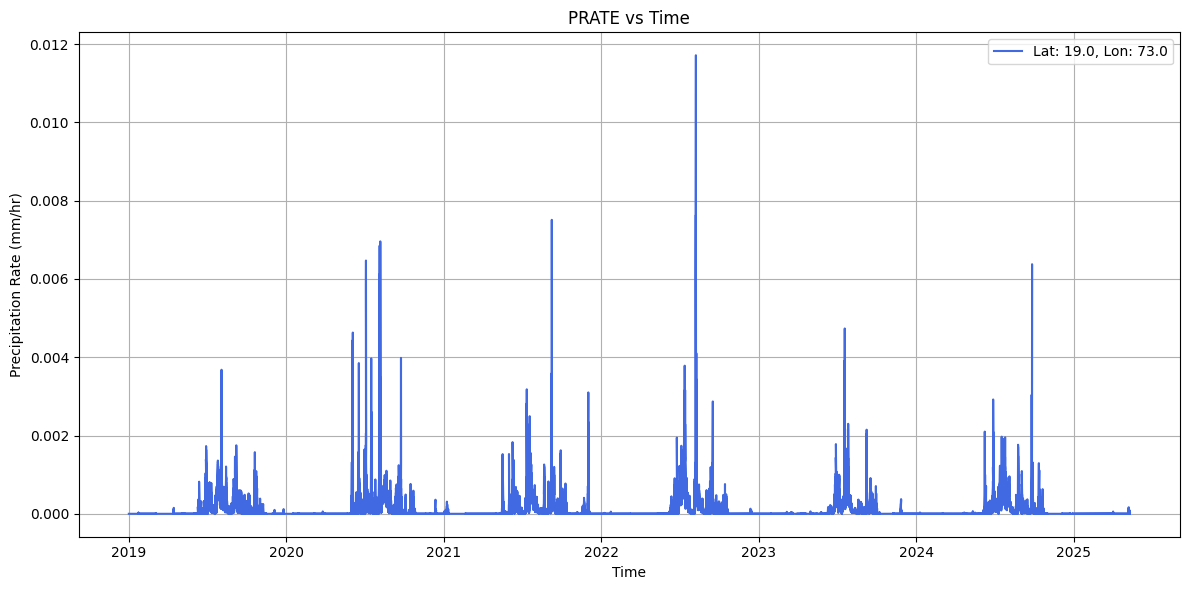

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset, num2date

# Folder where all .nc files are located
folder_path = 'prate'

# Target location (update this as needed)
target_lat = 19.0
target_lon = 73.0

# Lists to store time and PRATE values
all_times = []
all_prates = []

# Sort files by name (chronological order assumed from filename)
nc_files = sorted([f for f in os.listdir(folder_path) if f.endswith('.nc')])

# Read lat/lon once from the first file
sample_file = Dataset(os.path.join(folder_path, nc_files[0]))
latitudes = sample_file.variables['lat'][:]
longitudes = sample_file.variables['lon'][:]
sample_file.close()

# Find nearest grid point to desired lat/lon
lat_idx = np.abs(latitudes - target_lat).argmin()
lon_idx = np.abs(longitudes - target_lon).argmin()

# Loop through all NetCDF files
for file in nc_files:
    path = os.path.join(folder_path, file)
    nc = Dataset(path)

    # Read time and convert to datetime
    time_var = nc.variables['time']
    times = num2date(time_var[:], units=time_var.units, only_use_cftime_datetimes=False)

    # Read PRATE_L1_Avg_1 at specific lat/lon
    prate = nc.variables['PRATE_L1_Avg_1'][:, lat_idx, lon_idx]

    all_times.extend(times)
    all_prates.extend(prate)

    nc.close()

# Convert lists to arrays
all_times = np.array(all_times)
all_prates = np.array(all_prates)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(all_times, all_prates, label=f'Lat: {latitudes[lat_idx]}, Lon: {longitudes[lon_idx]}', color='royalblue')
plt.xlabel("Time")
plt.ylabel("Precipitation Rate (mm/hr)")
plt.title("PRATE vs Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [4]:
import pandas as pd

# Save previously collected data
df = pd.DataFrame({
    'time': all_times,
    'prate_mm_per_hr': all_prates
})
df.to_csv('prate_timeseries.csv', index=False)
print("Saved CSV as prate_timeseries.csv")

Saved CSV as prate_timeseries.csv


In [7]:
from netCDF4 import Dataset
import numpy as np

# Path to your .nc file
file_path = 'GFS_data\Pwater\gfs.0p25.2019033100.f018.grib2.nc'  # Replace with actual filename

# Open the file
nc = Dataset(file_path, 'r')

# --- Basic Info ---
print("📄 File Info:")
print(nc)


📄 File Info:
<class 'netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Creation date and time: 2025-05-10 13:43:35 -0600
    Conventions: CF-1.5
    Creator: NCAR - CISL RDA (dattore)
    dimensions(sizes): time(1), lat(37), lon(37), tstrlen(10)
    variables(dimensions): float32 time(time), |S1 valid_date_time(time, tstrlen), |S1 ref_date_time(time, tstrlen), int32 forecast_hour(time), float32 lat(lat), float32 lon(lon), float32 P_WAT_L200(time, lat, lon)
    groups: 


<>:5: SyntaxWarning: invalid escape sequence '\P'
<>:5: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Shubham\AppData\Local\Temp\ipykernel_6124\2016297543.py:5: SyntaxWarning: invalid escape sequence '\P'
  file_path = 'GFS_data\Pwater\gfs.0p25.2019033100.f018.grib2.nc'  # Replace with actual filename


<>:7: SyntaxWarning: invalid escape sequence '\P'
<>:7: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Shubham\AppData\Local\Temp\ipykernel_6124\26448135.py:7: SyntaxWarning: invalid escape sequence '\P'
  folder_path = 'GFS_data\Pwater'


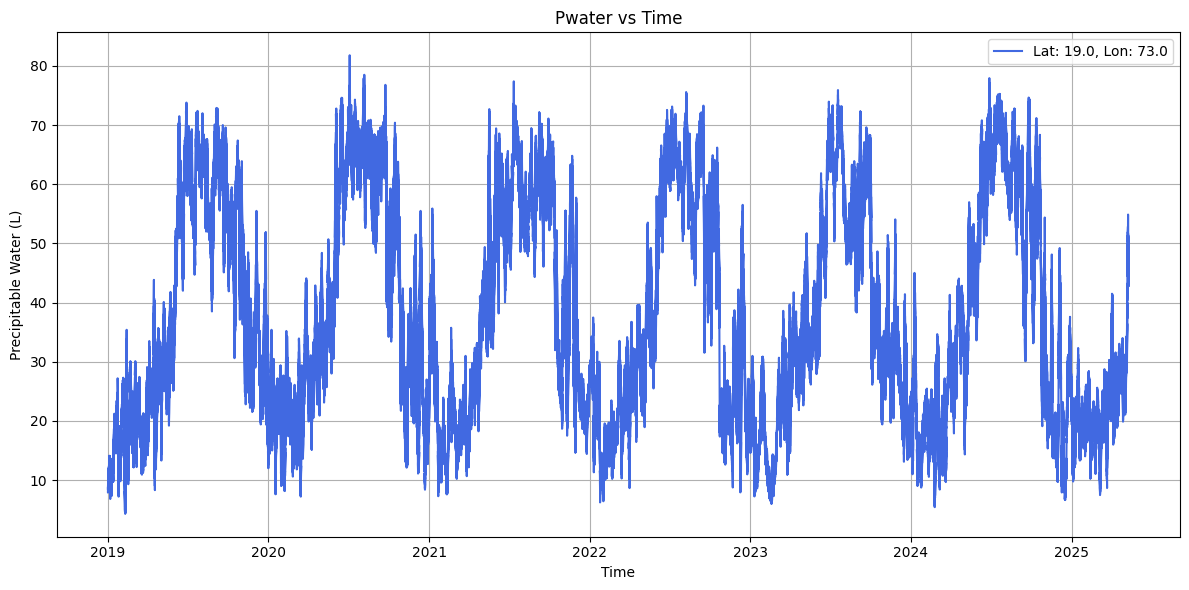

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset, num2date

# Folder where all .nc files are located
folder_path = 'GFS_data\Pwater'

# Target location (update this as needed)
target_lat = 19.0
target_lon = 73.0

# Lists to store time and PRATE values
all_times = []
all_prates = []

# Sort files by name (chronological order assumed from filename)
nc_files = sorted([f for f in os.listdir(folder_path) if f.endswith('.nc')])

# Read lat/lon once from the first file
sample_file = Dataset(os.path.join(folder_path, nc_files[0]))
latitudes = sample_file.variables['lat'][:]
longitudes = sample_file.variables['lon'][:]
sample_file.close()

# Find nearest grid point to desired lat/lon
lat_idx = np.abs(latitudes - target_lat).argmin()
lon_idx = np.abs(longitudes - target_lon).argmin()

# Loop through all NetCDF files
for file in nc_files:
    path = os.path.join(folder_path, file)
    nc = Dataset(path)

    # Read time and convert to datetime
    time_var = nc.variables['time']
    times = num2date(time_var[:], units=time_var.units, only_use_cftime_datetimes=False)

    # Read PRATE_L1_Avg_1 at specific lat/lon
    prate = nc.variables['P_WAT_L200'][:, lat_idx, lon_idx]

    all_times.extend(times)
    all_prates.extend(prate)

    nc.close()

# Convert lists to arrays
all_times = np.array(all_times)
all_prates = np.array(all_prates)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(all_times, all_prates, label=f'Lat: {latitudes[lat_idx]}, Lon: {longitudes[lon_idx]}', color='royalblue')
plt.xlabel("Time")
plt.ylabel("Precipitable Water (L)")
plt.title("Pwater vs Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [9]:
file_path = 'GFS_data\RH\gfs.0p25.2019033100.f018.grib2.nc'  # Replace with actual filename

# Open the file
nc = Dataset(file_path, 'r')

# --- Basic Info ---
print("📄 File Info:")
print(nc)

📄 File Info:
<class 'netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Creation date and time: 2025-05-10 14:06:47 -0600
    Conventions: CF-1.5
    Creator: NCAR - CISL RDA (dattore)
    dimensions(sizes): time(1), lat(37), lon(37), tstrlen(10)
    variables(dimensions): float32 time(time), |S1 valid_date_time(time, tstrlen), |S1 ref_date_time(time, tstrlen), int32 forecast_hour(time), float32 lat(lat), float32 lon(lon), float32 R_H_L100(time, lat, lon)
    groups: 


<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\Shubham\AppData\Local\Temp\ipykernel_6124\3038008996.py:1: SyntaxWarning: invalid escape sequence '\R'
  file_path = 'GFS_data\RH\gfs.0p25.2019033100.f018.grib2.nc'  # Replace with actual filename


<>:2: SyntaxWarning: invalid escape sequence '\R'
<>:2: SyntaxWarning: invalid escape sequence '\R'
C:\Users\Shubham\AppData\Local\Temp\ipykernel_6124\183110076.py:2: SyntaxWarning: invalid escape sequence '\R'
  folder_path = 'GFS_data\RH'


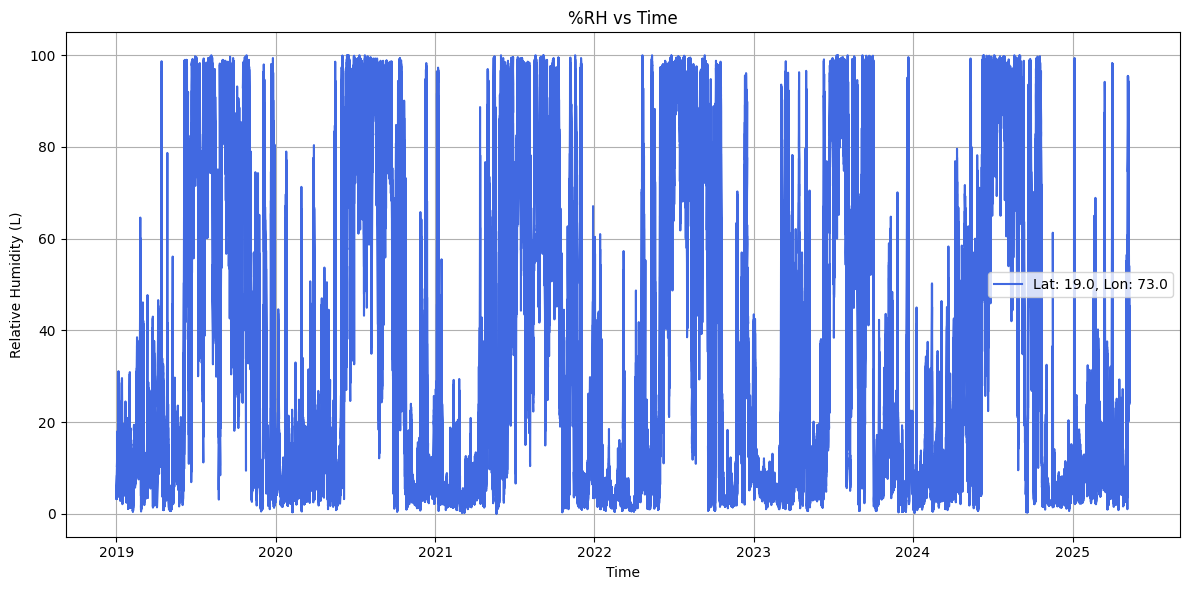

In [10]:
# Folder where all .nc files are located
folder_path = 'GFS_data\RH'

# Target location (update this as needed)
target_lat = 19.0
target_lon = 73.0

# Lists to store time and PRATE values
all_times = []
all_prates = []

# Sort files by name (chronological order assumed from filename)
nc_files = sorted([f for f in os.listdir(folder_path) if f.endswith('.nc')])

# Read lat/lon once from the first file
sample_file = Dataset(os.path.join(folder_path, nc_files[0]))
latitudes = sample_file.variables['lat'][:]
longitudes = sample_file.variables['lon'][:]
sample_file.close()

# Find nearest grid point to desired lat/lon
lat_idx = np.abs(latitudes - target_lat).argmin()
lon_idx = np.abs(longitudes - target_lon).argmin()

# Loop through all NetCDF files
for file in nc_files:
    path = os.path.join(folder_path, file)
    nc = Dataset(path)

    # Read time and convert to datetime
    time_var = nc.variables['time']
    times = num2date(time_var[:], units=time_var.units, only_use_cftime_datetimes=False)

    # Read PRATE_L1_Avg_1 at specific lat/lon
    prate = nc.variables['R_H_L100'][:, lat_idx, lon_idx]

    all_times.extend(times)
    all_prates.extend(prate)

    nc.close()

# Convert lists to arrays
all_times = np.array(all_times)
all_prates = np.array(all_prates)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(all_times, all_prates, label=f'Lat: {latitudes[lat_idx]}, Lon: {longitudes[lon_idx]}', color='royalblue')
plt.xlabel("Time")
plt.ylabel("Relative Humidity (L)")
plt.title("%RH vs Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [11]:
file_path = 'GFS_data\Pressure\gfs.0p25.2019011712.f030.grib2.nc'  # Replace with actual filename

# Open the file
nc = Dataset(file_path, 'r')

# --- Basic Info ---
print("📄 File Info:")
print(nc)

📄 File Info:
<class 'netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Creation date and time: 2025-05-10 14:22:25 -0600
    Conventions: CF-1.5
    Creator: NCAR - CISL RDA (dattore)
    dimensions(sizes): time(1), lat(37), lon(37), tstrlen(10)
    variables(dimensions): float32 time(time), |S1 valid_date_time(time, tstrlen), |S1 ref_date_time(time, tstrlen), int32 forecast_hour(time), float32 lat(lat), float32 lon(lon), float32 PRES_L1(time, lat, lon)
    groups: 


<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Shubham\AppData\Local\Temp\ipykernel_6124\3803406012.py:1: SyntaxWarning: invalid escape sequence '\P'
  file_path = 'GFS_data\Pressure\gfs.0p25.2019011712.f030.grib2.nc'  # Replace with actual filename


<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Shubham\AppData\Local\Temp\ipykernel_6124\236742171.py:2: SyntaxWarning: invalid escape sequence '\P'
  folder_path = 'GFS_data\Pressure'


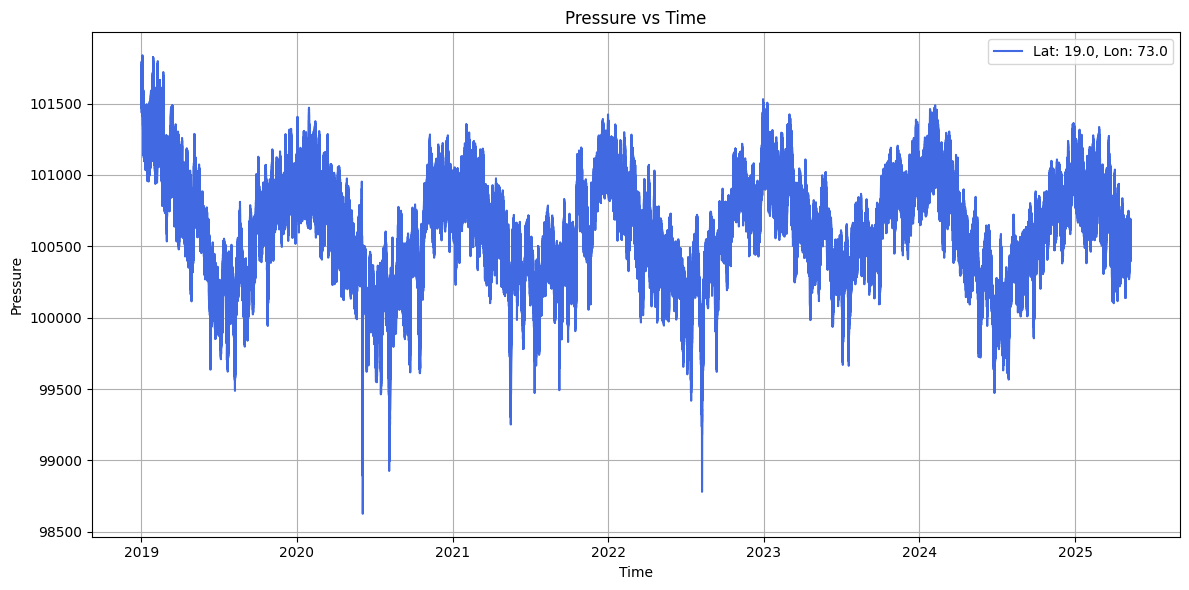

In [12]:
# Folder where all .nc files are located
folder_path = 'GFS_data\Pressure'

# Target location (update this as needed)
target_lat = 19.0
target_lon = 73.0

# Lists to store time and PRATE values
all_times = []
all_prates = []

# Sort files by name (chronological order assumed from filename)
nc_files = sorted([f for f in os.listdir(folder_path) if f.endswith('.nc')])

# Read lat/lon once from the first file
sample_file = Dataset(os.path.join(folder_path, nc_files[0]))
latitudes = sample_file.variables['lat'][:]
longitudes = sample_file.variables['lon'][:]
sample_file.close()

# Find nearest grid point to desired lat/lon
lat_idx = np.abs(latitudes - target_lat).argmin()
lon_idx = np.abs(longitudes - target_lon).argmin()

# Loop through all NetCDF files
for file in nc_files:
    path = os.path.join(folder_path, file)
    nc = Dataset(path)

    # Read time and convert to datetime
    time_var = nc.variables['time']
    times = num2date(time_var[:], units=time_var.units, only_use_cftime_datetimes=False)

    # Read PRATE_L1_Avg_1 at specific lat/lon
    prate = nc.variables['PRES_L1'][:, lat_idx, lon_idx]

    all_times.extend(times)
    all_prates.extend(prate)

    nc.close()

# Convert lists to arrays
all_times = np.array(all_times)
all_prates = np.array(all_prates)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(all_times, all_prates, label=f'Lat: {latitudes[lat_idx]}, Lon: {longitudes[lon_idx]}', color='royalblue')
plt.xlabel("Time")
plt.ylabel("Pressure")
plt.title("Pressure vs Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
file_path = 'GFS_data\Temperature\gfs.0p25.2019033100.f018.grib2.nc'  # Replace with actual filename

# Open the file
nc = Dataset(file_path, 'r')

# --- Basic Info ---
print("📄 File Info:")
print(nc)

📄 File Info:
<class 'netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Creation date and time: 2025-05-10 14:29:03 -0600
    Conventions: CF-1.5
    Creator: NCAR - CISL RDA (dattore)
    dimensions(sizes): time(1), lat(37), lon(37), tstrlen(10)
    variables(dimensions): float32 time(time), |S1 valid_date_time(time, tstrlen), |S1 ref_date_time(time, tstrlen), int32 forecast_hour(time), float32 lat(lat), float32 lon(lon), float32 TMP_L100(time, lat, lon)
    groups: 


<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Shubham\AppData\Local\Temp\ipykernel_6124\2812251499.py:1: SyntaxWarning: invalid escape sequence '\T'
  file_path = 'GFS_data\Temperature\gfs.0p25.2019033100.f018.grib2.nc'  # Replace with actual filename


<>:2: SyntaxWarning: invalid escape sequence '\T'
<>:2: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Shubham\AppData\Local\Temp\ipykernel_6124\1107912547.py:2: SyntaxWarning: invalid escape sequence '\T'
  folder_path = 'GFS_data\Temperature'


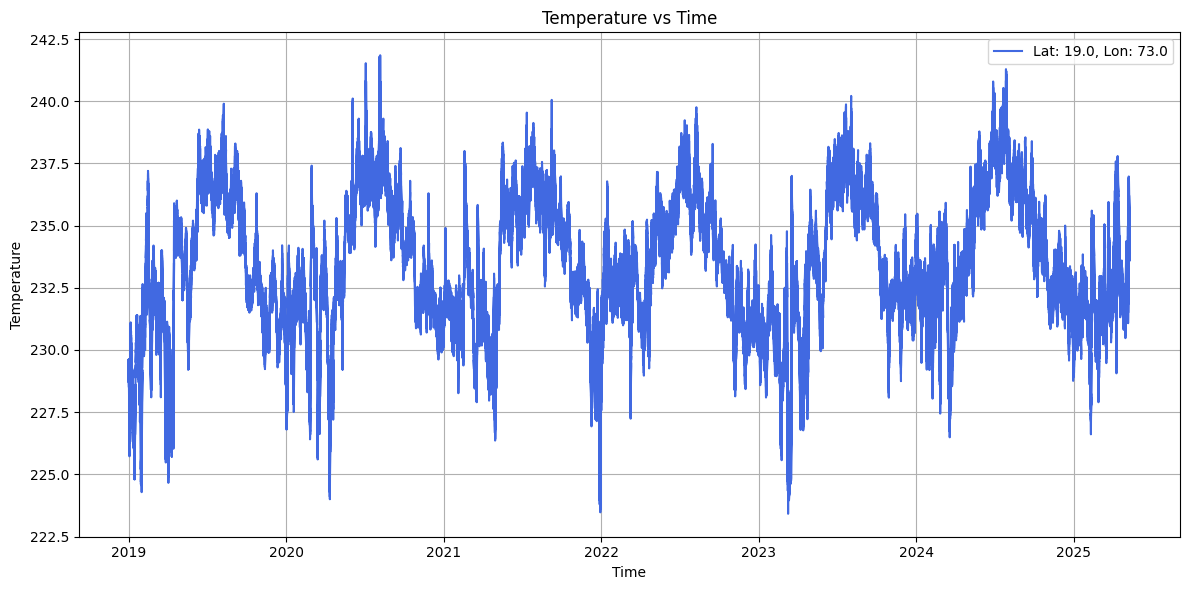

In [14]:
# Folder where all .nc files are located
folder_path = 'GFS_data\Temperature'

# Target location (update this as needed)
target_lat = 19.0
target_lon = 73.0

# Lists to store time and PRATE values
all_times = []
all_prates = []

# Sort files by name (chronological order assumed from filename)
nc_files = sorted([f for f in os.listdir(folder_path) if f.endswith('.nc')])

# Read lat/lon once from the first file
sample_file = Dataset(os.path.join(folder_path, nc_files[0]))
latitudes = sample_file.variables['lat'][:]
longitudes = sample_file.variables['lon'][:]
sample_file.close()

# Find nearest grid point to desired lat/lon
lat_idx = np.abs(latitudes - target_lat).argmin()
lon_idx = np.abs(longitudes - target_lon).argmin()

# Loop through all NetCDF files
for file in nc_files:
    path = os.path.join(folder_path, file)
    nc = Dataset(path)

    # Read time and convert to datetime
    time_var = nc.variables['time']
    times = num2date(time_var[:], units=time_var.units, only_use_cftime_datetimes=False)

    # Read PRATE_L1_Avg_1 at specific lat/lon
    prate = nc.variables['TMP_L100'][:, lat_idx, lon_idx]

    all_times.extend(times)
    all_prates.extend(prate)

    nc.close()

# Convert lists to arrays
all_times = np.array(all_times)
all_prates = np.array(all_prates)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(all_times, all_prates, label=f'Lat: {latitudes[lat_idx]}, Lon: {longitudes[lon_idx]}', color='royalblue')
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("Temperature vs Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [5]:
file_path = 'GFS_data\Pressure\gfs.0p25.2018123012.f036.grib2.nc'  # Replace with actual filename

# Open the file
nc = Dataset(file_path, 'r')

# --- Basic Info ---
print("📄 File Info:")
print(nc)

📄 File Info:
<class 'netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Creation date and time: 2025-05-10 14:14:34 -0600
    Conventions: CF-1.5
    Creator: NCAR - CISL RDA (dattore)
    dimensions(sizes): time(1), lat(37), lon(37), tstrlen(10)
    variables(dimensions): float32 time(time), |S1 valid_date_time(time, tstrlen), |S1 ref_date_time(time, tstrlen), int32 forecast_hour(time), float32 lat(lat), float32 lon(lon), float32 PRES_L1(time, lat, lon)
    groups: 


<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Shubham\AppData\Local\Temp\ipykernel_13148\807978312.py:1: SyntaxWarning: invalid escape sequence '\P'
  file_path = 'GFS_data\Pressure\gfs.0p25.2018123012.f036.grib2.nc'  # Replace with actual filename


In [6]:
import xarray as xr
# Load the NetCDF file
ds = xr.open_dataset("GFS_data\Temperature\gfs.0p25.2019033100.f018.grib2.nc")

# Check the possible values for 'ref_date_time'
print(ds['ref_date_time'].values)


<>:3: SyntaxWarning: invalid escape sequence '\T'
<>:3: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Shubham\AppData\Local\Temp\ipykernel_13148\1184299778.py:3: SyntaxWarning: invalid escape sequence '\T'
  ds = xr.open_dataset("GFS_data\Temperature\gfs.0p25.2019033100.f018.grib2.nc")


[b'2019033100']


C:\Users\Shubham\AppData\Local\Temp\ipykernel_13148\1184299778.py:3: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  ds = xr.open_dataset("GFS_data\Temperature\gfs.0p25.2019033100.f018.grib2.nc")
